1. (60) Given a data set (two dimensional) which I will create on Monday, with no labels as a csv file
        a. The columns are labeled feature1, feature2.
        b. The rows are the number of samples.
        c. You must use your own created algorithm based on the class notes, see page cv-11.
         i. This is a lot of details! Don’t wait for class to work them out.
        d. use the two features.
        e. Start with two random centroids.
        f. Use the L2 norm for computing the nearest centroid.
         i. Calculate the MSE, which equals to the average distance of the samples to their current centroids based on L2 norm.
        g. Stop either after n_iter or when the mse doesn’t change by much.
        h. Draw the initial and the final centroids.
        i. Draw the final clusters.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def random_centroids_function(data_array, number_of_clusters):

    centroids = []
    init_centroids = random.sample(range(0, len(data_array)), number_of_clusters)
    for i in init_centroids:
        centroids.append(data_array.loc[i])
    centroids = np.array(centroids)

    return np.array(centroids)

data_array = pd.read_csv("convertcsv.csv",header=None)
data_array.head()
data_array_to_work = np.array(data_array)

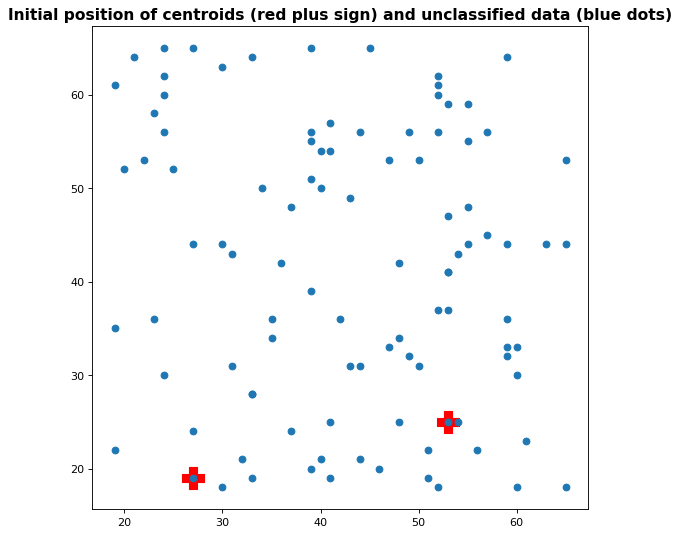

In [21]:
centroids = random_centroids_function(data_array, 2)

plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Initial position of centroids (red plus sign) and unclassified data (blue dots)', fontsize=14, fontweight='bold')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=400, c='r', marker='P')
plt.scatter(data_array_to_work[:, 0], data_array_to_work[:, 1], cmap='cividis')
plt.show()

In [22]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5
def findClosestCentroids(centroids, data_array_to_work):
    assigned_centroid = []
    dictionary_to_print = {}
    for i in range(len(data_array_to_work)):
        distance=[]
        for j in range(len(centroids)):
            distance.append(calc_distance(data_array_to_work[i], centroids[j]))
        assigned_centroid.append(np.argmin(distance))
    
    for i in range(len(centroids)):
        dictionary_to_print[i] = {}
        dictionary_to_print[i]["Count"] = 0
        dictionary_to_print[i]["MSE"] = 0
    
    for i in range(len(data_array_to_work)):
        to_mean_distance = calc_distance(data_array_to_work[i], centroids[assigned_centroid[i]])
        dictionary_to_print[assigned_centroid[i]]["Count"] += 1
        dictionary_to_print[assigned_centroid[i]]["MSE"] += to_mean_distance
    
    for i in range(len(centroids)):
        dictionary_to_print[i]["MSE"] /= dictionary_to_print[i]["Count"]
    print(dictionary_to_print)
                                                                     
    return assigned_centroid


In [23]:
def calc_centroids(clusters, data_array_to_work):
    new_centroids = []
    new_data_to_work = pd.concat([pd.DataFrame(data_array_to_work), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    
    for cluster in set(new_data_to_work['cluster']):
        current_cluster = new_data_to_work[new_data_to_work['cluster'] == cluster][new_data_to_work.columns[:-1]]
        current_cluster=np.nan_to_num(current_cluster, copy=True, nan=0.0)
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [24]:
def final_function_to_iterate (centroids, data_array_to_work, number_of_iterations):
    for i in range(number_of_iterations):
        print("Iteration number:" + str(i+1))
        get_centroids = findClosestCentroids(centroids, data_array_to_work)
        centroids = calc_centroids(get_centroids, data_array_to_work)
        if i==(number_of_iterations-1):
            plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
            plt.title('Final position of centroids (red plus sign) and classified data', fontsize=14, fontweight='bold')
            plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=400, c='r', marker='P')
            plt.scatter(data_array_to_work[:, 0], data_array_to_work[:, 1], c=get_centroids, cmap='cividis')
            plt.show()

Iteration number:1
{0: {'Count': 68, 'MSE': 20.655911150305485}, 1: {'Count': 32, 'MSE': 23.18299559051894}}
Iteration number:2
{0: {'Count': 64, 'MSE': 14.744551316882568}, 1: {'Count': 36, 'MSE': 15.942721814995329}}
Iteration number:3
{0: {'Count': 60, 'MSE': 14.519661738397655}, 1: {'Count': 40, 'MSE': 15.809864358317625}}
Iteration number:4
{0: {'Count': 57, 'MSE': 14.341092984511468}, 1: {'Count': 43, 'MSE': 15.291801542287597}}
Iteration number:5
{0: {'Count': 55, 'MSE': 14.061901601447607}, 1: {'Count': 45, 'MSE': 15.210123142658139}}
Iteration number:6
{0: {'Count': 56, 'MSE': 14.210215558053184}, 1: {'Count': 44, 'MSE': 14.807913458985372}}
Iteration number:7
{0: {'Count': 57, 'MSE': 14.405721987463451}, 1: {'Count': 43, 'MSE': 14.516824735524152}}
Iteration number:8
{0: {'Count': 58, 'MSE': 14.660408714393666}, 1: {'Count': 42, 'MSE': 14.125472355356914}}
Iteration number:9
{0: {'Count': 57, 'MSE': 14.546891185144954}, 1: {'Count': 43, 'MSE': 14.240227456757822}}
Iteration n

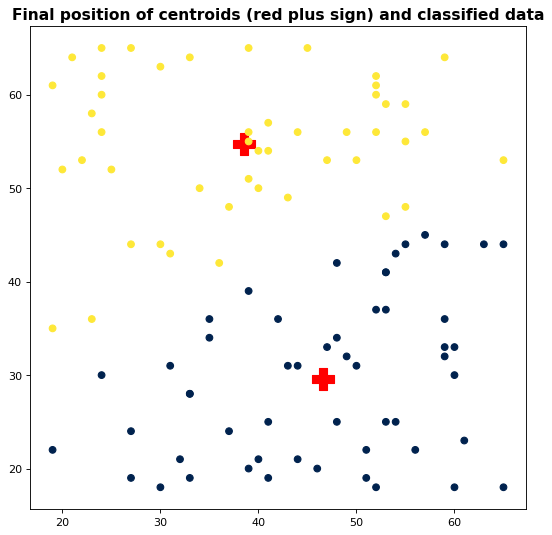

In [25]:
final_function_to_iterate (centroids, data_array_to_work, 15)

2. (40) Given a node with current members, you should be able to computer the gain in impurity based on two properties and decide which one is the better criterion to split a node
        a. Using Entropy.
        b. Using Gini Variance

In [26]:
array_initial = [1,2,3,3,4,5,7,8,2,3]
array_split_1_left_child = [1,2,3,3,4]
array_split_1_right_child = [5,7,8,2,3]
array_split_2_left_child = [3,3,4,5,7]
array_split_2_right_child = [1,2,8,2,3]



In [27]:
def calculate_entropy(array_to_check):
    dictionary_to_count = {}
    for item in array_to_check:
        if (item in dictionary_to_count):
            dictionary_to_count[item] += 1
        else:
            dictionary_to_count[item] = 1
    
    to_entropy = 0
    
    for key in dictionary_to_count:
        dictionary_to_count[key] /= len(array_to_check)
        
    for key in dictionary_to_count:
        to_entropy += dictionary_to_count[key]*np.log2(dictionary_to_count[key])
        
    to_entropy *= -1
    return to_entropy
    
def impurity_gain_entropy(array_to_check_parent, child_arrays):
    parent_entropy = calculate_entropy(array_to_check_parent)
    children_entropy = 0
    for child in child_arrays:
        children_entropy += ((len(child)/len(array_to_check_parent))*calculate_entropy(child))
    return (parent_entropy - children_entropy)
def best_entropy_split(array_to_check_parent, child_arrays1, child_arrays2):
    splits = [impurity_gain_entropy(array_to_check_parent, child_arrays1), impurity_gain_entropy(array_to_check_parent, child_arrays2)]
    print("Maximal ENTROPY gain " + str(np.max(splits)) + " is relevant for the split with index " + str(np.argmax(splits)))
    
def calculate_gini(array_to_check):
    dictionary_to_count = {}
    for item in array_to_check:
        if (item in dictionary_to_count):
            dictionary_to_count[item] += 1
        else:
            dictionary_to_count[item] = 1
    
    to_gini = 0
    
    for key in dictionary_to_count:
        dictionary_to_count[key] /= len(array_to_check)
        to_gini += (dictionary_to_count[key]**2)
        
    to_gini = 1-to_gini
    return to_gini
    
def impurity_gain_gini(array_to_check_parent, child_arrays):
    parent_gini = calculate_gini(array_to_check_parent)
    children_gini = 0
    for child in child_arrays:
        children_gini += ((len(child)/len(array_to_check_parent))*calculate_gini(child))
    return (parent_gini - children_gini)
def best_gini_split(array_to_check_parent, child_arrays1, child_arrays2):
    splits = [impurity_gain_gini(array_to_check_parent, child_arrays1), impurity_gain_gini(array_to_check_parent, child_arrays2)]
    print("Maximal GINI gain " + str(np.max(splits)) + " is relevant for the split with index " + str(np.argmax(splits)))

In [28]:
best_entropy_split(array_initial, [array_split_1_left_child, array_split_1_right_child], [array_split_2_left_child, array_split_2_right_child])
best_gini_split(array_initial, [array_split_1_left_child, array_split_1_right_child], [array_split_2_left_child, array_split_2_right_child])

Maximal ENTROPY gain 0.724511249783653 is relevant for the split with index 1
Maximal GINI gain 0.09999999999999998 is relevant for the split with index 1
